# Equipo B12 - evaluación voltaje 3.3

Hecho por Jorge 06/11/2022

- Sensor distancia económico 
- DHT22
- NRF24l01p
- Datalogger placa versión B

Arduino mini pro 3.3v con divisor de tensión modificado, regulador de tensión de 3.3v, **transistor para invertir y un moffset**. La microSD y display puenteado el regulador de 3.3v porque va directo. El RTC alimentado como siempre. 

In [1]:
import os
import glob
import datetime

import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [3]:
path = r'data/EQ-B12-arduino3.3/1-prueba-casa-jorge/'              
all_files = glob.glob(os.path.join(path, "*.CSV"))
all_files = sorted(all_files, reverse=False)

all_files

['data/EQ-B12-arduino3.3/1-prueba-casa-jorge/20221103.CSV',
 'data/EQ-B12-arduino3.3/1-prueba-casa-jorge/20221104.CSV',
 'data/EQ-B12-arduino3.3/1-prueba-casa-jorge/20221105.CSV',
 'data/EQ-B12-arduino3.3/1-prueba-casa-jorge/20221106.CSV',
 'data/EQ-B12-arduino3.3/1-prueba-casa-jorge/20221107.CSV']

In [4]:
col = ['datetime', 'voltaje', 'nada1', 'humedad','temp', 'distancia', 'nada2']
dfs = (pd.read_csv(f, sep=";", parse_dates=['datetime'], names=col, comment='#') for f in all_files)
eq_b12 = pd.concat(dfs, ignore_index=True)
eq_b12.tail()

datetime  voltaje nada1  humedad  temp  distancia  nada2
5489 2022-11-07 14:49:03     4.07    ht       20  34.0     180.28    NaN
5490 2022-11-07 15:06:46     4.09    ht       34  28.4      45.11    NaN
5491 2022-11-07 15:06:57     4.09    ht       34  28.1      45.29    NaN
5492 2022-11-07 15:07:04     4.09    ht       34  28.1      44.39    NaN
5493 2022-11-07 15:08:05     4.08    ht       36  27.4      60.40    NaN

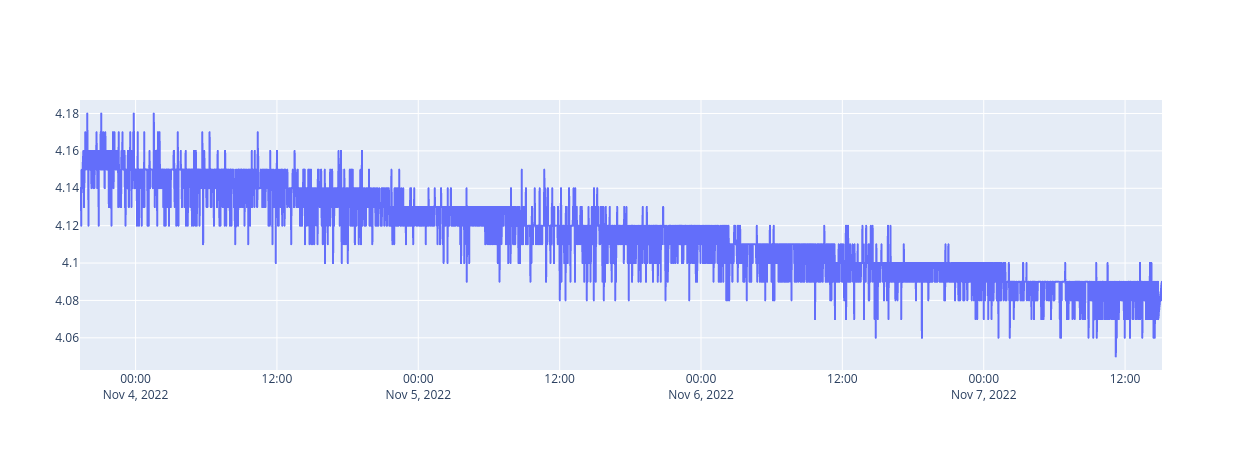

In [6]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=eq_b12["datetime"], y=eq_b12["voltaje"], mode="lines"))

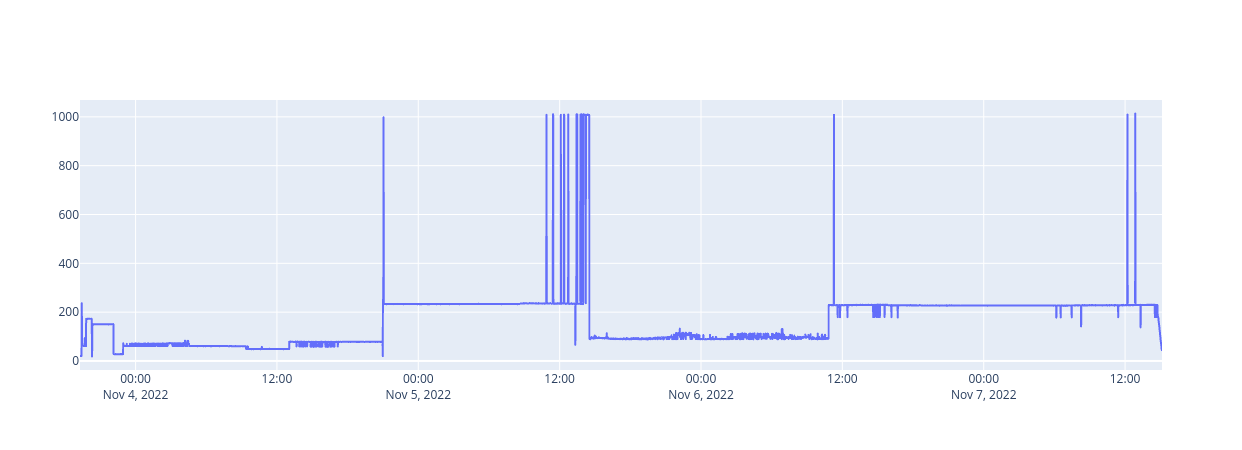

In [7]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=eq_b12["datetime"], y=eq_b12["distancia"], mode="lines"))